In [54]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
import matplotlib.pyplot as plt

# Prepare

In [55]:
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()
df.head(3)

#Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

#Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Model

In [56]:
pls_model = PLSRegression().fit(X_train, y_train)
pls_model.coef_[:5]

array([[35.32916493],
       [48.83425857],
       [18.50240933],
       [39.28117603],
       [30.59952998]])

# Predict

In [57]:
y_pred_train = pls_model.predict(X_train)
print(f"Train MSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}\n"
      f"Train R2: {r2_score(y_train, y_pred_train)}")
y_pred_test = pls_model.predict(X_test)
print(f"Test MSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}\n"
      f"Test R2: {r2_score(y_test, y_pred_test)}")

Train MSE: 310.1167593109696
Train R2: 0.5140424486535481
Test MSE: 398.09956327448526
Test R2: 0.2678940112232916


# Model Tuning

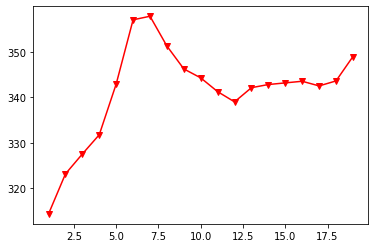

In [58]:
# Cross Validition
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Loop for calculate errors
RSME = []
for i in np.arange(1, X_train.shape[1]+1):
    pls_model = PLSRegression(n_components= i)
    score = np.sqrt(-1*model_selection.cross_val_score(pls_model, X_train, y_train, cv=cv_10, scoring="neg_mean_squared_error")).mean()
    RSME.append(score)

# Plot
plt.plot(np.arange(1, X_train.shape[1]+1), np.array(RSME), '-v', c = "r");

# Final Model

In [62]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)
y_pred_test = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_test))

398.09956327448526